# Checkpoint 3

In [5]:
import pandas as ps
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 

kcHouseData=ps.read_csv('kc_house_data.csv')
kcHouseData

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [19]:
def pcm( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sb.diverging_palette( 230 , 375, as_cmap = True )

    s = sb.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 },ax=ax,annot = True, annot_kws = { 'fontsize' : 11 })
    

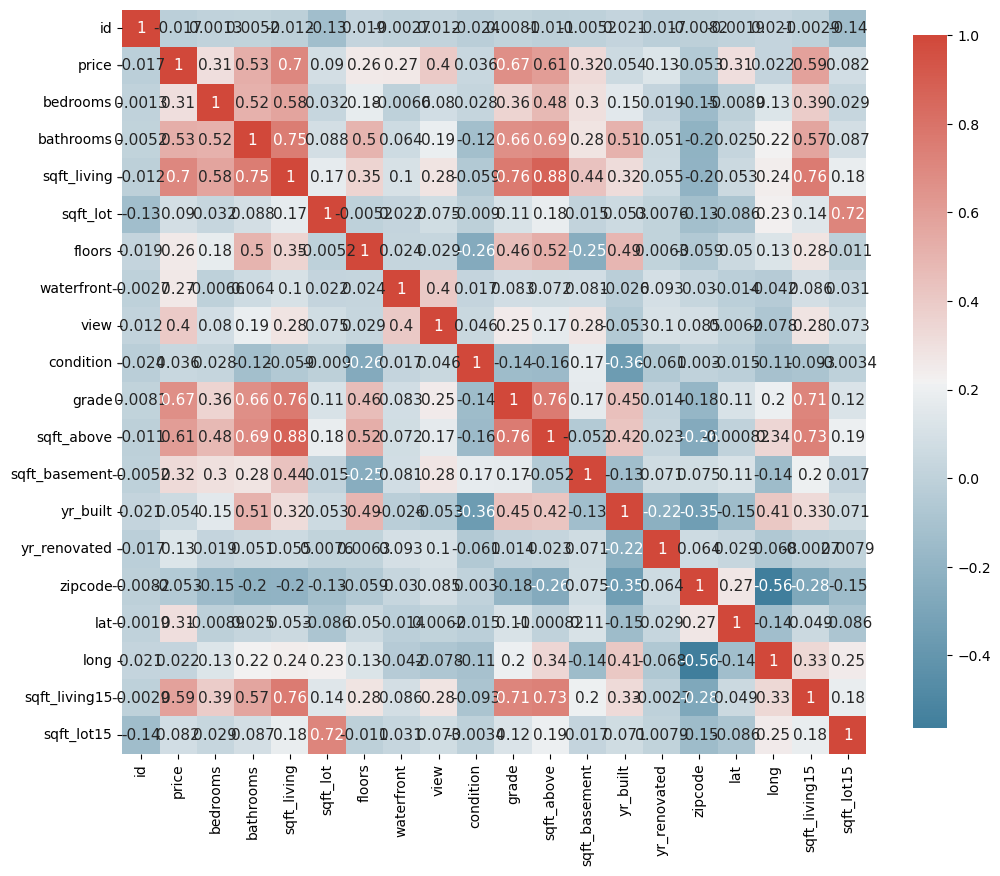

In [20]:
pcm(kcHouseData)

In [22]:
x=kcHouseData["sqft_living"].values[:,np.newaxis]
y=kcHouseData["price"].values
xt,xt_,yt,yt_=train_test_split(x,y,test_size=0.36,random_state=40)
model=LinearRegression()
model.fit(xt_,yt_)

LinearRegression()

In [23]:
predict=model.predict(xt_)
print(metrics.r2_score(yt_,predict))

0.5023254577322439


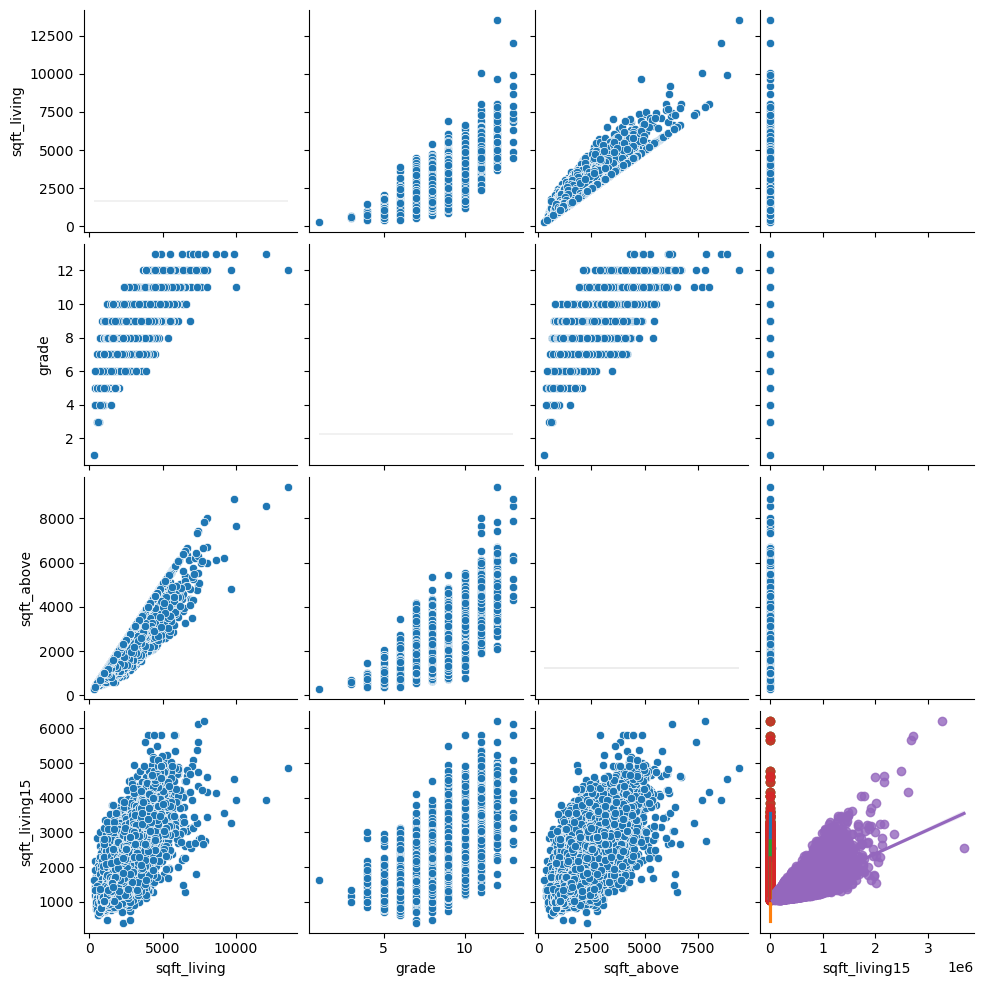

In [26]:
sb.pairplot(kcHouseData[["sqft_living","grade","sqft_above","sqft_living15"]])
# create a regression plot to visualize the relationship between each independent variable and the dependent variable
sb.regplot(x='sqft_living', y='price', data=kcHouseData)
sb.regplot(x='grade', y='price', data=kcHouseData)
sb.regplot(x='sqft_above', y='price', data=kcHouseData)
sb.regplot(x='sqft_living15',y='price',data=kcHouseData)

# create a multiple linear regression plot to visualize the overall relationship between all independent variables and the dependent variable
sb.regplot(x=model.predict(x), y=y, data=kcHouseData)

# display the plots
plt.show()

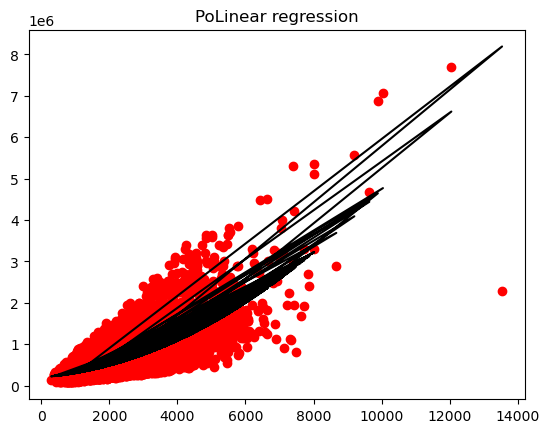

In [27]:
x= kcHouseData["sqft_living"].values.reshape(-1,1)
y= kcHouseData["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y)
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("PoLinear regression")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

In [28]:
predict=model.predict(xt_)
print(metrics.r2_score(yt_,predict))

0.5023254577322439
